In [197]:
import torch
import matplotlib.pyplot as plt
device = 'cpu'

import schrodinger_solvers
import generator
import importlib
importlib.reload(schrodinger_solvers)
importlib.reload(generator)

from data import data

In [198]:
dat_ = data.get_nuclear_data()[12:74] # Z = 3 through 10
num_nucleons = torch.tensor(dat_[['z','n']].to_numpy(), device=device).float()
Z = num_nucleons[:,0].unsqueeze(1)
N = num_nucleons[:,1].unsqueeze(1)
binding = -torch.tensor(dat_['binding'].to_numpy(), device=device).unsqueeze(1).float()

In [199]:
rho_max = 12
z_max = 12
max_range = 7

solver = schrodinger_solvers.CylindricalSchrodingerSolver(rho_max, z_max, device=device)
coulomb_field_generator = generator.MeanFieldGenerator(rho_max, z_max, max_range, device=device)
strong_field_generator = generator.MeanFieldGenerator(rho_max, z_max, max_range, device=device)

coulomb_field_generator.load_state_dict(torch.load(f"saves/coulomb_field_generator-max_range={max_range}"))
strong_field_generator.load_state_dict(torch.load(f"saves/strong_field_generator-max_range={max_range}"))

<All keys matched successfully>

In [200]:
coulomb_field = -torch.abs(coulomb_field_generator(num_nucleons))
strong_field = strong_field_generator(num_nucleons)

proton_field = coulomb_field + strong_field
neutron_field = strong_field

In [202]:
dat_

,z,n,binding
12,3,2,26.330662
13,3,3,31.993987
14,3,4,39.245081
15,3,5,41.277699
16,3,6,45.339917
...,...,...,...
69,7,13,134.183434
70,7,14,138.789334
71,7,15,140.327763
72,7,16,143.443458


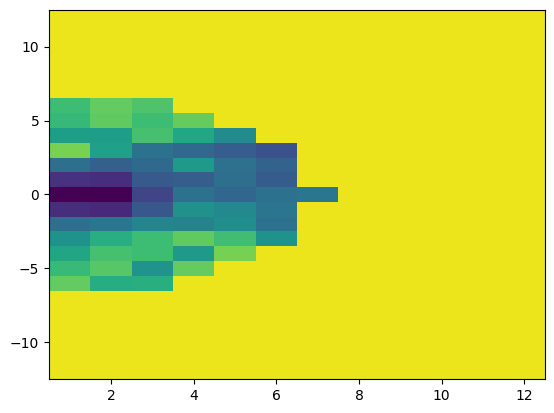

In [201]:
plt.pcolormesh(solver.RHO.cpu(), solver.Z.cpu(), proton_field[-1].detach().cpu(), vmin=proton_field.min(), vmax=proton_field.max())


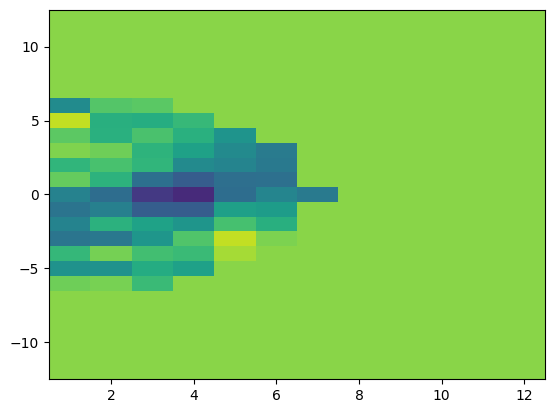

In [203]:
plt.pcolormesh(solver.RHO.cpu(), solver.Z.cpu(), neutron_field[-1].detach().cpu(), vmin=neutron_field.min(), vmax=neutron_field.max())


In [204]:
eigvals, indices, eigvecs = solver._solve_energy_eigenstates(proton_field, True, max_alpha=6)

In [ ]:
eigvals[0]

In [180]:
# What is the largest alpha being used in the relevant eigenstates?
(indices[:,0:int(Z.max()//2)]//(eigvecs.shape[2]*eigvecs.shape[3])).max()


tensor(2)

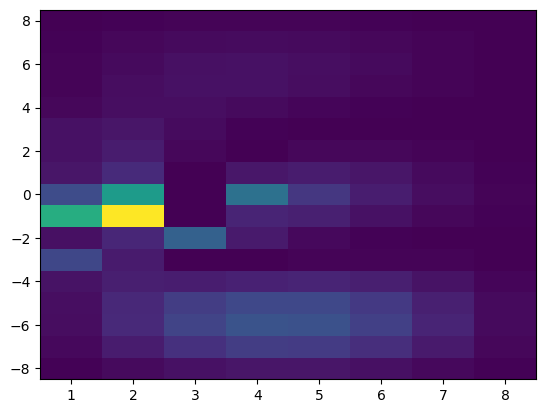

In [64]:
batch = -1
eig = 20
plt.pcolormesh(solver.RHO.cpu(), solver.Z.cpu(), eigvecs[batch,indices[batch,eig]].detach().cpu())